<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
import numpy as np

In [2]:
RANDOM_STATE = 12345

## Подготовка данных

Загрузим данные

In [3]:
try :
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')

In [4]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Посмотрим есть ли очевидные дубликаты

In [6]:
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


Такие значения отсутствуют

Первые замечания, которые можно выделить это то, что у нас присутсвует ненужный столбецы - столбец RowNumber (по факту дублирует нумерацию строк) и столбец Surname(излишняя информация), также столбец CustomerID также является излишний информацией (может понадобиться только в случае анализа данные и изученения на дубликаты), далее удалим их. Также есть только один столбец, в котором присутсвуют пропуски - Tenure.

In [7]:
data=data.drop(columns = ['RowNumber', 'Surname', 'CustomerId'],axis = 1)

In [8]:
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

Удалим пропуски

In [9]:
data = data.dropna().reset_index(drop=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Geography        9091 non-null   object 
 2   Gender           9091 non-null   object 
 3   Age              9091 non-null   int64  
 4   Tenure           9091 non-null   float64
 5   Balance          9091 non-null   float64
 6   NumOfProducts    9091 non-null   int64  
 7   HasCrCard        9091 non-null   int64  
 8   IsActiveMember   9091 non-null   int64  
 9   EstimatedSalary  9091 non-null   float64
 10  Exited           9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 781.4+ KB


Проверим на выбросы такие столбцы как: CreditScore, Balance и EstimatedSalary.

<AxesSubplot:>

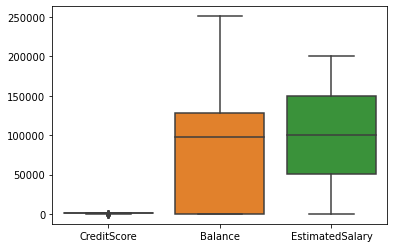

In [11]:
sns.boxplot(data = data[['CreditScore', 'Balance', 'EstimatedSalary']])

У столбцов Balance и EstimatedSalary отсутсвуют выбросы. Также заметим, что в CreditScore присутсвуют выбросы, построим более наглядный график и посчитаем сколько таких выбросов.

<AxesSubplot:>

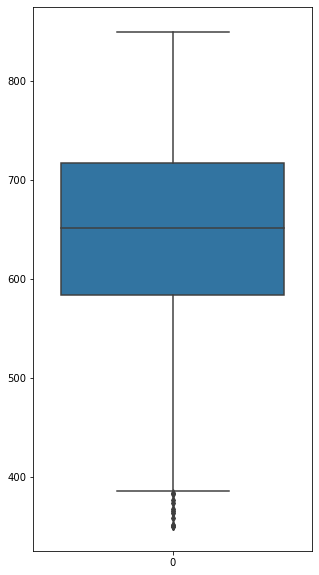

In [12]:
plt.rcParams['figure.figsize']=(5,10)
sns.boxplot(data = data['CreditScore'])

In [13]:
q3 = data['CreditScore'].quantile(0.75)
q1 = data['CreditScore'].quantile(0.25)
IQR = q3 - q1
print('Доля: ', data.loc[data['CreditScore'] <= q1 - 1.5*IQR]['CreditScore'].count() / data['CreditScore'].count())

Доля:  0.0015399846001539984


Так как выбросы составляют малую долю от всех данных, то удалим данные строки.

In [14]:
data=data.loc[data['CreditScore'] >= q1 - 1.5*IQR]
data=data.reset_index(drop=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9077 entries, 0 to 9076
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9077 non-null   int64  
 1   Geography        9077 non-null   object 
 2   Gender           9077 non-null   object 
 3   Age              9077 non-null   int64  
 4   Tenure           9077 non-null   float64
 5   Balance          9077 non-null   float64
 6   NumOfProducts    9077 non-null   int64  
 7   HasCrCard        9077 non-null   int64  
 8   IsActiveMember   9077 non-null   int64  
 9   EstimatedSalary  9077 non-null   float64
 10  Exited           9077 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 780.2+ KB


 Перенесу разбиение на тестовую и тренировочную вверх, чтобы учесть замечания ниже, и передам параметр для стратификации.

Разобьем данные на тестовую, валидационную и обучающую выборки в соотношении 15%, 15% и 70% соотвественно. Так как тренировочная выборка служит набором для обучения модели, то она должна составлять большую часть от всех данных. Валидационная и тестовая имеет один размер, потому что являются уже некоторыми "проверочными" данными модели, но по валидационной выборки происходит подбор гиперпараметра, а по тестовой уже финальный результат работы модели. Сначала разобьем все данные в расчете 70/30, а затем полученную меньшую часть пополам. 

In [16]:
features = data.drop(columns = ['Exited'],axis = 1)
target = data['Exited']

In [17]:
feature_train, feature_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.3, random_state=RANDOM_STATE, stratify = target)
features_test, features_valid, target_test, target_valid = train_test_split(
    feature_valid_test,
    target_valid_test, 
    test_size=0.5, random_state=RANDOM_STATE, stratify = target_valid_test)

In [18]:
data['Geography'].value_counts()

France     4546
Germany    2289
Spain      2242
Name: Geography, dtype: int64

Преобразуем категориальные признаки Geography и Gender в количественные методом One-Hot Encoding, а также удалим из полученных столбцов каждого признака, чтобы избежать дамми-ловушку.

In [19]:
drop_enc = OneHotEncoder(drop='first').fit(feature_train[['Geography', 'Gender']])
data_ohe = drop_enc.transform(data[['Geography', 'Gender']]).toarray()
ohe_df = pd.DataFrame(data_ohe, columns=['Geography_Germany', 'Geography_Spain', 'Gender_Male']) # использовала get_feature_names_out, но выдает не очень читабельные столбцы (x0_Germany,x0_Spain, x1_Male)
data = pd.concat([data, ohe_df], axis=1).drop(['Geography', 'Gender'], axis=1)

In [20]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


Стандартизируем данные, так как значения столбцов имеет очень сильный разброс. Перед этим разобьем данные на fetures и target.

In [21]:
columns=['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary', 'Balance']
scaler = StandardScaler()
scaler.fit(feature_train[columns]) 
data[columns] = scaler.transform(data[columns])

In [22]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.338071,0.303169,-1.043266,-1.235779,-0.91220,1,1,0.016655,1,0.0,0.0,0.0
1,-0.452882,0.207542,-1.390493,0.106522,-0.91220,0,1,0.211457,0,0.0,1.0,0.0
2,-1.559245,0.303169,1.040096,1.321413,2.52098,1,0,0.235629,1,0.0,0.0,0.0
3,0.496920,0.016287,-1.390493,-1.235779,0.80439,0,0,-0.114254,0,0.0,0.0,0.0
4,2.072966,0.398797,-1.043266,0.774453,-0.91220,1,1,-0.370816,0,0.0,1.0,0.0


In [23]:
features = data.drop(columns = ['Exited'],axis = 1)
target = data['Exited']
feature_train, feature_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.3, random_state=RANDOM_STATE, stratify=target)
features_test, features_valid, target_test, target_valid = train_test_split(
    feature_valid_test,
    target_valid_test, 
    test_size=0.5, random_state=RANDOM_STATE, stratify = target_valid_test)

## Исследование задачи

Исследуем баланс классов

<AxesSubplot:>

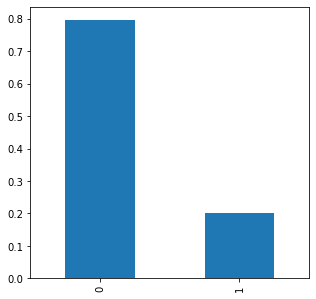

In [24]:
plt.rcParams['figure.figsize']=(5,5)
target_frequency = target.value_counts(normalize=True)
target_frequency.plot(kind='bar') 

Можно заметить, что результатов, что клиент останется превышает количество результатов, что клиент ушел, это и говорит о дисбалансе классов.

Построим все ранние изученные модели и выберем лучшую по метрике f1-score.

Были рассмотрены три модели и подобраны лучшие гиперпараметры с учетом наличия дисбаланса

In [25]:
def model_param(name_model, list_iter, class_weight=None, f_train = feature_train, t_train = target_train):
    #best_model = None
    best_f1 = 0
    best_roc = 0
    best_param = 0
    for param in list_iter:
        if name_model == 'Tree':
            model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=param, class_weight=class_weight)
        elif name_model == 'Forest':
            model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=param, class_weight=class_weight)
        elif name_model == 'LogReg':
            model = LogisticRegression(random_state=RANDOM_STATE, C=param, class_weight=class_weight)
        else:
            return 'Неправильно введеное имя модели'
            
        model.fit(f_train, t_train)

        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        predictions = model.predict(features_valid)
        result_f1, result_roc = f1_score(target_valid, predictions), roc_auc_score(target_valid, probabilities_one_valid)
        print("Гиперпараметр =", param, 'f1-score:', result_f1, 'roc:', result_roc)    
        if result_f1 > best_f1:
            #best_model = model
            best_f1 = result_f1
            best_roc = result_roc
            best_param = param
    print("------------------Итог------------------")
    print("Лучшая модель по F1:", best_f1, 'гиперпараметр =', best_param)
    return best_param, best_f1, best_roc

     

In [26]:
print('Decision Tree')
f1_roc_disb={}
parametr, f1, roc = model_param('Tree', range(1, 10))
f1_roc_disb['Decision Tree:'] = [parametr, f1, roc]

Decision Tree
Гиперпараметр = 1 f1-score: 0.0 roc: 0.6807390503643206
Гиперпараметр = 2 f1-score: 0.48275862068965514 roc: 0.7205474150585849
Гиперпараметр = 3 f1-score: 0.34857142857142853 roc: 0.7738409800624549
Гиперпараметр = 4 f1-score: 0.48456057007125886 roc: 0.8110937625110097
Гиперпараметр = 5 f1-score: 0.49631449631449637 roc: 0.8229858942536099
Гиперпараметр = 6 f1-score: 0.49388753056234724 roc: 0.8124015800571169
Гиперпараметр = 7 f1-score: 0.5535714285714285 roc: 0.8134141377745749
Гиперпараметр = 8 f1-score: 0.498812351543943 roc: 0.8060943630394747
Гиперпараметр = 9 f1-score: 0.5044642857142857 roc: 0.7910911602209945
------------------Итог------------------
Лучшая модель по F1: 0.5535714285714285 гиперпараметр = 7


In [27]:
print('Logistic Regression')
c_values = [0.001,0.01,0.1,1,10,100]
parametr, f1, roc = model_param('LogReg', c_values)
f1_roc_disb['Logistic Regression:'] = [parametr, f1, roc]

Logistic Regression
Гиперпараметр = 0.001 f1-score: 0.0 roc: 0.7498098326527344
Гиперпараметр = 0.01 f1-score: 0.19879518072289157 roc: 0.7578569140843943
Гиперпараметр = 0.1 f1-score: 0.2972972972972973 roc: 0.7581138068166653
Гиперпараметр = 1 f1-score: 0.3048128342245989 roc: 0.7580804441241625
Гиперпараметр = 10 f1-score: 0.3048128342245989 roc: 0.7580670990471614
Гиперпараметр = 100 f1-score: 0.3048128342245989 roc: 0.7580704353164118
------------------Итог------------------
Лучшая модель по F1: 0.3048128342245989 гиперпараметр = 1


In [28]:
print('Random Forest')
parametr, f1, roc = model_param('Forest', range(100, 800, 100))
f1_roc_disb['Random Forest:'] = [parametr, f1, roc]

Random Forest
Гиперпараметр = 100 f1-score: 0.5364705882352941 roc: 0.8419892839031682
Гиперпараметр = 200 f1-score: 0.5492957746478873 roc: 0.845050310940294
Гиперпараметр = 300 f1-score: 0.5433255269320844 roc: 0.8456158085782154
Гиперпараметр = 400 f1-score: 0.5526932084309133 roc: 0.8452454826914352
Гиперпараметр = 500 f1-score: 0.5526932084309133 roc: 0.8451370539408012
Гиперпараметр = 600 f1-score: 0.5594405594405595 roc: 0.8457125603864735
Гиперпараметр = 700 f1-score: 0.5480093676814988 roc: 0.8448434622467772
------------------Итог------------------
Лучшая модель по F1: 0.5594405594405595 гиперпараметр = 600


In [29]:
for key, value in f1_roc_disb.items():
    print(key, 'f1:', value[1], 'roc:', value[2])

Decision Tree: f1: 0.5535714285714285 roc: 0.8134141377745749
Logistic Regression: f1: 0.3048128342245989 roc: 0.7580804441241625
Random Forest: f1: 0.5594405594405595 roc: 0.8457125603864735


По проведенному анализу получилось, что метрикам f1-score и roc модели случайного лес выше решающее дерева, но ненамного. Хуже всего себя показала логистическая регрессия

## Борьба с дисбалансом

### Взвешивание классов

In [30]:
print('Decision Tree')
f1_roc_class_weight={}
parametr, f1, roc = model_param('Tree', range(1, 10), class_weight='balanced')
f1_roc_class_weight['Decision Tree:'] = [parametr, f1, roc]

Decision Tree
Гиперпараметр = 1 f1-score: 0.475482912332838 roc: 0.6807390503643206
Гиперпараметр = 2 f1-score: 0.49418604651162795 roc: 0.7205474150585849
Гиперпараметр = 3 f1-score: 0.5205047318611988 roc: 0.7803533776389888
Гиперпараметр = 4 f1-score: 0.5318860244233379 roc: 0.8028948808284623
Гиперпараметр = 5 f1-score: 0.559774964838256 roc: 0.8223887020578109
Гиперпараметр = 6 f1-score: 0.5477888730385165 roc: 0.805231937438279
Гиперпараметр = 7 f1-score: 0.5537555228276878 roc: 0.8059725892118398
Гиперпараметр = 8 f1-score: 0.5480631276901005 roc: 0.7936851095630821
Гиперпараметр = 9 f1-score: 0.5363636363636363 roc: 0.7578452371420183
------------------Итог------------------
Лучшая модель по F1: 0.559774964838256 гиперпараметр = 5


In [31]:
print('Logistic Regression')
c_values = [0.001,0.01,0.1,1,10,100]
parametr, f1, roc = model_param('LogReg', c_values, class_weight='balanced')
f1_roc_class_weight['Logistic Regression:'] = [parametr, f1, roc]

Logistic Regression
Гиперпараметр = 0.001 f1-score: 0.490272373540856 roc: 0.7513211626231083
Гиперпараметр = 0.01 f1-score: 0.46967741935483875 roc: 0.7581805322016708
Гиперпараметр = 0.1 f1-score: 0.4721141374837873 roc: 0.759304854939013
Гиперпараметр = 1 f1-score: 0.47272727272727266 roc: 0.7592147756692557
Гиперпараметр = 10 f1-score: 0.47272727272727266 roc: 0.7592481383617583
Гиперпараметр = 100 f1-score: 0.47272727272727266 roc: 0.7592648197080096
------------------Итог------------------
Лучшая модель по F1: 0.490272373540856 гиперпараметр = 0.001


In [32]:
print('Random Forest')
parametr, f1, roc = model_param('Forest', range(100, 800, 100), class_weight='balanced')
f1_roc_class_weight['Random Forest:'] = [parametr, f1, roc]

Random Forest
Гиперпараметр = 100 f1-score: 0.5323741007194245 roc: 0.8414421357461233
Гиперпараметр = 200 f1-score: 0.5402843601895735 roc: 0.8482598019590574
Гиперпараметр = 300 f1-score: 0.5333333333333334 roc: 0.8473256465689806
Гиперпараметр = 400 f1-score: 0.5380952380952381 roc: 0.8470787626444605
Гиперпараметр = 500 f1-score: 0.5368171021377672 roc: 0.8460795500040035
Гиперпараметр = 600 f1-score: 0.5437352245862884 roc: 0.8461295940427576
Гиперпараметр = 700 f1-score: 0.5393794749403341 roc: 0.8451820935756799
------------------Итог------------------
Лучшая модель по F1: 0.5437352245862884 гиперпараметр = 600


In [33]:
for key, value in f1_roc_class_weight.items():
    print(key, 'f1:', value[1], 'roc:', value[2])

Decision Tree: f1: 0.559774964838256 roc: 0.8223887020578109
Logistic Regression: f1: 0.490272373540856 roc: 0.7513211626231083
Random Forest: f1: 0.5437352245862884 roc: 0.8461295940427576


Как видно, в этом случае немного выше результат показала уже модель решающее дерево, но все равно их результаты с случайным лесом очень близки.

### Увеличение выборки

Выясним сколько блоков единиц нужно повторить, чтобы сравнить с количеством нулей.

In [34]:
blocks_count = feature_train[target_train == 0]['CreditScore'].count()/feature_train[target_train == 1]['CreditScore'].count()
blocks_count

3.9324534161490683

Создадим функцию, которая сначала разделит выборки с ответом 0 и 1. Далее добавит несколько раз положительные ответы и перемешает выборки.

In [35]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [36]:
feature_train_increase, target_train_increase = upsample(feature_train, target_train, int(blocks_count))

In [37]:
print('0:',feature_train_increase[target_train_increase == 0]['CreditScore'].count(), 
      '1:',feature_train_increase[target_train_increase == 1]['CreditScore'].count())

0: 5065 1: 3864


In [38]:
print('Decision Tree')
f1_roc_increase={}
parametr, f1, roc = model_param('Tree', range(1, 10),
                                f_train=feature_train_increase, t_train = target_train_increase)
f1_roc_increase['Decision Tree:'] = [parametr, f1, roc]


Decision Tree
Гиперпараметр = 1 f1-score: 0.475482912332838 roc: 0.6807390503643206
Гиперпараметр = 2 f1-score: 0.49418604651162795 roc: 0.7205474150585849
Гиперпараметр = 3 f1-score: 0.5042372881355932 roc: 0.7738409800624549
Гиперпараметр = 4 f1-score: 0.5547445255474451 roc: 0.8112522353003977
Гиперпараметр = 5 f1-score: 0.5576208178438661 roc: 0.8237282141617958
Гиперпараметр = 6 f1-score: 0.5687789799072642 roc: 0.8172892145087677
Гиперпараметр = 7 f1-score: 0.5767284991568297 roc: 0.8062294819441108
Гиперпараметр = 8 f1-score: 0.5553822152886115 roc: 0.7928910774815171
Гиперпараметр = 9 f1-score: 0.5562499999999999 roc: 0.7712720527397443
------------------Итог------------------
Лучшая модель по F1: 0.5767284991568297 гиперпараметр = 7


In [39]:
print('Logistic Regression')
c_values = [0.001,0.01,0.1,1,10,100]
parametr, f1, roc = model_param('LogReg', c_values, f_train=feature_train_increase, t_train = target_train_increase)
f1_roc_increase['Logistic Regression:'] = [parametr, f1, roc]

Logistic Regression
Гиперпараметр = 0.001 f1-score: 0.48217317487266553 roc: 0.752829156324232
Гиперпараметр = 0.01 f1-score: 0.4945904173106646 roc: 0.758500814049697
Гиперпараметр = 0.1 f1-score: 0.48024316109422494 roc: 0.7590946699762458
Гиперпараметр = 1 f1-score: 0.48244274809160304 roc: 0.7590279445912403
Гиперпараметр = 10 f1-score: 0.47938931297709925 roc: 0.7590446259374917
Гиперпараметр = 100 f1-score: 0.47938931297709925 roc: 0.7590546347452425
------------------Итог------------------
Лучшая модель по F1: 0.4945904173106646 гиперпараметр = 0.01


In [40]:
print('Random Forest')
parametr, f1, roc = model_param('Forest', range(100, 800, 100), 
                                f_train=feature_train_increase, t_train = target_train_increase)
f1_roc_increase['Random Forest:'] = [parametr, f1, roc]

Random Forest
Гиперпараметр = 100 f1-score: 0.5791666666666667 roc: 0.840376197720661
Гиперпараметр = 200 f1-score: 0.5815899581589957 roc: 0.8423028932126938
Гиперпараметр = 300 f1-score: 0.5803757828810021 roc: 0.8440394213574614
Гиперпараметр = 400 f1-score: 0.5797101449275364 roc: 0.8426181706568447
Гиперпараметр = 500 f1-score: 0.5797101449275364 roc: 0.8425931486374675
Гиперпараметр = 600 f1-score: 0.5809128630705395 roc: 0.8428266874849868
Гиперпараметр = 700 f1-score: 0.587991718426501 roc: 0.8430535537940055
------------------Итог------------------
Лучшая модель по F1: 0.587991718426501 гиперпараметр = 700


In [41]:
for key, value in f1_roc_increase.items():
    print(key, 'f1:', value[1], 'roc:', value[2])

Decision Tree: f1: 0.5767284991568297 roc: 0.8062294819441108
Logistic Regression: f1: 0.4945904173106646 roc: 0.758500814049697
Random Forest: f1: 0.587991718426501 roc: 0.8430535537940055


Увеличив выборку, мы получили более высокое значение f1-score, по сравнению с предыдущими моделями,что свидетельствует о влияние наличия дисбаланса на эффективность модели.

### Уменьшение выборки

In [42]:
print('0:',feature_train[target_train == 0]['CreditScore'].count(), 
      '1:',feature_train[target_train == 1]['CreditScore'].count())

0: 5065 1: 1288


Посмотрим в каком соотношение кол-во нулей и единиц для дальнейшего внесения парамтера fraction.

In [43]:
frac = feature_train[target_train == 1]['CreditScore'].count()/feature_train[target_train == 0]['CreditScore'].count()
frac = round(frac, 3)
frac

0.254

In [44]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [45]:
features_train_downsampled, target_train_downsampled = downsample(feature_train, target_train, frac)

In [46]:
print('0:',features_train_downsampled[target_train_downsampled == 0]['CreditScore'].count(), 
      '1:',features_train_downsampled[target_train_downsampled == 1]['CreditScore'].count())

0: 1287 1: 1288


In [47]:
print('Decision Tree')
f1_roc_decrease={}
parametr, f1, roc = model_param('Tree', range(1, 10),
                                f_train=features_train_downsampled, t_train = target_train_downsampled)
f1_roc_decrease['Decision Tree:'] = [parametr, f1, roc]


Decision Tree
Гиперпараметр = 1 f1-score: 0.48256624825662486 roc: 0.6900172151493313
Гиперпараметр = 2 f1-score: 0.5006839945280438 roc: 0.7335188299036485
Гиперпараметр = 3 f1-score: 0.5006839945280438 roc: 0.7804000854084928
Гиперпараметр = 4 f1-score: 0.5339652448657188 roc: 0.8001090960044839
Гиперпараметр = 5 f1-score: 0.5592972181551976 roc: 0.8202434809298849
Гиперпараметр = 6 f1-score: 0.5387994143484627 roc: 0.8120746256705902
Гиперпараметр = 7 f1-score: 0.558421851289833 roc: 0.8087950729975713
Гиперпараметр = 8 f1-score: 0.5269645608628659 roc: 0.7867857047535165
Гиперпараметр = 9 f1-score: 0.5386819484240687 roc: 0.7594449782475244
------------------Итог------------------
Лучшая модель по F1: 0.5592972181551976 гиперпараметр = 5


In [48]:
print('Logistic Regression')
c_values = [0.001,0.01,0.1,1,10,100]
parametr, f1, roc = model_param('LogReg', c_values,  
                                f_train=features_train_downsampled, t_train = target_train_downsampled)
f1_roc_decrease['Logistic Regression:'] = [parametr, f1, roc]

Logistic Regression
Гиперпараметр = 0.001 f1-score: 0.489795918367347 roc: 0.7436744335014813
Гиперпараметр = 0.01 f1-score: 0.475095785440613 roc: 0.7548909707209011
Гиперпараметр = 0.1 f1-score: 0.4827586206896552 roc: 0.7584207435876904
Гиперпараметр = 1 f1-score: 0.48020434227330777 roc: 0.7586209197427068
Гиперпараметр = 10 f1-score: 0.4808184143222507 roc: 0.7587076627432139
Гиперпараметр = 100 f1-score: 0.4808184143222507 roc: 0.7587043264739637
------------------Итог------------------
Лучшая модель по F1: 0.489795918367347 гиперпараметр = 0.001


In [55]:
print('Random Forest')
parametr, f1, roc = model_param('Forest', range(100, 800, 100), 
                               f_train=features_train_downsampled, t_train = target_train_downsampled)
f1_roc_decrease['Random Forest:'] = [parametr, f1, roc]

Random Forest
Гиперпараметр = 100 f1-score: 0.5917159763313609 roc: 0.8440894653962152
Гиперпараметр = 200 f1-score: 0.5850746268656717 roc: 0.8454473269810767
Гиперпараметр = 300 f1-score: 0.5777126099706745 roc: 0.8437725198174394
Гиперпараметр = 400 f1-score: 0.5777126099706745 roc: 0.8442963140897323
Гиперпараметр = 500 f1-score: 0.5730994152046783 roc: 0.8448985106894067
Гиперпараметр = 600 f1-score: 0.5701754385964912 roc: 0.8451403902100515
Гиперпараметр = 700 f1-score: 0.5751824817518248 roc: 0.8443146635706087
Гиперпараметр = 800 f1-score: 0.5764192139737991 roc: 0.8445381936103771
Гиперпараметр = 900 f1-score: 0.5784883720930232 roc: 0.8447350334961431
------------------Итог------------------
Лучшая модель по F1: 0.5917159763313609 гиперпараметр = 100


In [50]:
for key, value in f1_roc_decrease.items():
    print(key, 'f1:', value[1], 'roc:', value[2])

Decision Tree: f1: 0.5592972181551976 roc: 0.8202434809298849
Logistic Regression: f1: 0.489795918367347 roc: 0.7436744335014813
Random Forest: f1: 0.5917159763313609 roc: 0.8440894653962152


В данном случае здесь уже более заметно лидерство модели случайный лес.

Построим таблицу для сравнения методов борьбы с дисбалансом и выбора лучшей модели

In [51]:
#print(f1_roc_disb, f1_roc_class_weight, f1_roc_increase, f1_roc_decrease)
for key in f1_roc_disb.keys():
    print(key, 'с дисбалансом:', 'F1-score:', f1_roc_disb[key][1], 'ROC:',  f1_roc_disb[key][2])
    print(key, 'без дисб, взвешивание классов :', 'F1-score:', f1_roc_class_weight[key][1], 'ROC:',  f1_roc_class_weight[key][2])
    print(key, 'без дисб, увелич. выборки:', 'F1-score:', f1_roc_increase[key][1], 'ROC:',  f1_roc_increase[key][2])
    print(key, 'без дисб, уменьш. выборки:', 'F1-score:', f1_roc_decrease[key][1], 'ROC:',  f1_roc_decrease[key][2])
    print('-------------------------------------------------------')

Decision Tree: с дисбалансом: F1-score: 0.5535714285714285 ROC: 0.8134141377745749
Decision Tree: без дисб, взвешивание классов : F1-score: 0.559774964838256 ROC: 0.8223887020578109
Decision Tree: без дисб, увелич. выборки: F1-score: 0.5767284991568297 ROC: 0.8062294819441108
Decision Tree: без дисб, уменьш. выборки: F1-score: 0.5592972181551976 ROC: 0.8202434809298849
-------------------------------------------------------
Logistic Regression: с дисбалансом: F1-score: 0.3048128342245989 ROC: 0.7580804441241625
Logistic Regression: без дисб, взвешивание классов : F1-score: 0.490272373540856 ROC: 0.7513211626231083
Logistic Regression: без дисб, увелич. выборки: F1-score: 0.4945904173106646 ROC: 0.758500814049697
Logistic Regression: без дисб, уменьш. выборки: F1-score: 0.489795918367347 ROC: 0.7436744335014813
-------------------------------------------------------
Random Forest: с дисбалансом: F1-score: 0.5594405594405595 ROC: 0.8457125603864735
Random Forest: без дисб, взвешивание кл


<h2>Вывод:</h2>
По результату проведенных исследований лучшей моделью получилась модель случайного леса, а в борьбе с дисбалансом лучше всего показал себя метод уменьшения выборки.

## Тестирование модели


Итого финальная модель это:

Модель случайного лес с кол-вом деревьев = 100 и с методом борьбы с дисбалансом downsampling.

In [59]:
best_model_forest = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100)
best_model_forest.fit(features_train_downsampled, target_train_downsampled)
print('F1-score:',f1_score(target_test,best_model_forest.predict(features_test)))
probabilities_test = best_model_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print('ROC:', roc_auc_score(target_test, probabilities_one_test))

F1-score: 0.5843971631205674
ROC: 0.8498795606800651



Но получили f1-score меньше 0.59, но если взять кол-во деревьев = 200 (следующий по лучшему результату f1), то уже получим требуемые величину(нижу). Такое возможно, потому как значения близки и вероятнее всего, шаг для перебора количества деревьев оказался слишком большим и более подходящее значение оказалось пропущено. Также для более точной настройки случайного леса лучше подбирать и глубину деревьев

In [60]:
best_model_forest = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=200)
best_model_forest.fit(features_train_downsampled, target_train_downsampled)
print('F1-score:',f1_score(target_test,best_model_forest.predict(features_test)))
probabilities_test = best_model_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print('ROC:', roc_auc_score(target_test, probabilities_one_test))

F1-score: 0.596888260254597
ROC: 0.8506285531267515



Тогда финальной моделью оставим модель с гиперпараметром = 200.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*